# EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES

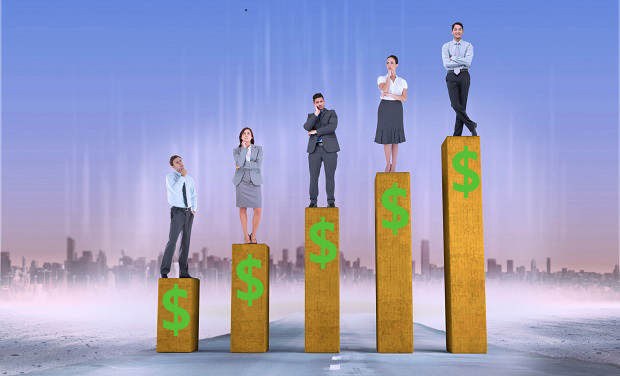

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import missingno as mno
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.io as pio
from wordcloud import WordCloud
color_pal = sns.color_palette()
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

import nltk
import re

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


<ipython-input-1-0605ab5c7201>:13: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [2]:
df=pd.read_csv("/content/ds_salaries.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [7]:
df.shape

(607, 12)

In [8]:
unique_values = df.nunique()
unique_values

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [ ]:
print(df.isna().sum())
df.isna().sum().plot(kind='bar')
plt.show()
sns.barplot(df.isna())
plt.xticks(rotation=45)
plt.show()

In [10]:
df.duplicated().sum()

0

In [11]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [13]:

!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5b056250a8cb366e75cf406547dc98ab570e95bce47d7f2fa3c327ba485b4f85
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d0

In [ ]:
!pip install --upgrade pandas-profiling

In [ ]:
!pip install typeguard==2.12.0

In [17]:
from ydata_profiling import ProfileReport

# Create a comprehensive profile report for the DataFrame 'df'
# This report will contain various statistics, insights, and visualizations about the data
profile = ProfileReport(df)

In [18]:
profile                     # or this one
profile.to_notebook_iframe() # use this line to show the output

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
locationLocation_of_Studnet = df.groupby('company_size')['salary'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: locationLocation, y-axis: Location ,
# labels for the x-axis, title, and customized height
locationLocation_of_Studnet = px.line(
    locationLocation_of_Studnet,  # DataFrame containing the data
    x='company_size',   # x-values
    y='salary',  # y-values
    title='salary  by company_size',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
locationLocation_of_Studnet.show()


locationLocation_of_Studnet = df.groupby('job_title')['salary'].sum().reset_index()
# Create a line plot using Plotly Express
# x-axis: locationLocation, y-axis: Location ,
# labels for the x-axis, title, and customized height
locationLocation_of_Studnet = px.line(
    locationLocation_of_Studnet,  # DataFrame containing the data
    x='job_title',   # x-values
    y='salary',  # y-values
    title='salary  by job_title',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
locationLocation_of_Studnet.show()


<Axes: >

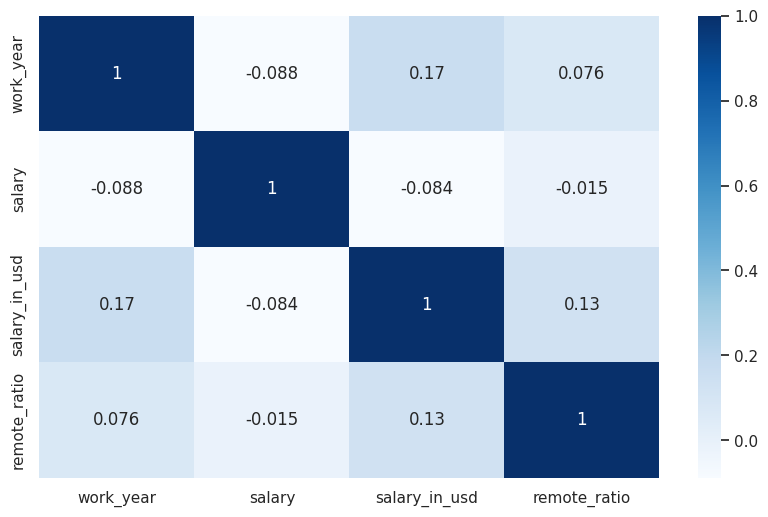

In [21]:
# Correlation:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(['Unnamed: 0'], axis = 1).corr(), cmap="Blues", annot = True)

In [22]:
# Calculate the value counts for each unique value in the 'job_title' column
top10_Location = df['job_title'].value_counts()[:10]

# Create a bar plot using Plotly Express
# y-axis: Count of each job title, x-axis: Location,
# color-coded by job titles and using a color palette
fig = px.bar(
    y=top10_Location.values,  # y-values: count of each job title
    x=top10_Location.index,   # x-values: job titles
    color=top10_Location.index,  # Color the bars based on job titles
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_Location.values,  # Display the count values on top of the bars
    title='Top 10 job_title',  # Set the title of the plot
    template='plotly_white'  # Use a dark template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='job_title Distribution',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="job_title",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

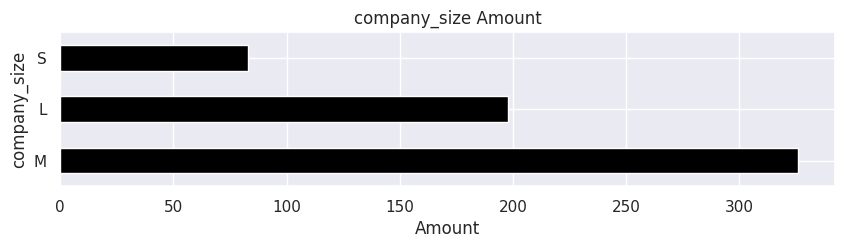

In [23]:
df['company_size'].value_counts().plot(kind = 'barh', figsize = (10,2), grid = True, color='black')
plt.title('company_size Amount')
plt.xlabel('Amount')
plt.ylabel('company_size')
plt.show()

In [ ]:
# Calculate the average salary for each Hotel Name and sort in descending order
average_Price = df.groupby('experience_level')['salary'].mean().reset_index()
average_Price = average_Price.sort_values(by='salary', ascending=False)

# Select the top 10 Hotel Name with the highest average price
top_10_Price = average_Price.head(10)

# Create a new figure using Plotly
fig = go.Figure()

# Add a bar trace to the figure
fig.add_trace(go.Bar(
    x=top_10_Price['experience_level'],  # x-values: Hotel Name
    y=top_10_Price['salary']  # y-values: average Price
))

# Update the layout and appearance of the plot
fig.update_layout(
    title='Top 10 experience_level by salary',  # Set the title of the plot
    xaxis_title='experience_level',  # Label for the x-axis
    yaxis_title='salary',  # Label for the y-axis
    #paper_bgcolor='#595964',  # Background color of the plot
    template='plotly_white',  # Use a dark template for the plot
    font=dict(color='black'),  # Set font color to white
    height=800  # Set the height of the plot
)

# Initialize Plotly for notebook integration
pyo.init_notebook_mode(connected=True)

# Display the plot
pyo.iplot(fig)

In [ ]:
# Calculate the value counts for each unique value in the 'employment_type' column
type_grouped = df['employment_type'].value_counts()

# Define the desired order of employment types
e_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

# Create a bar plot using Plotly Express
# x-axis: Employment types, y-axis: Count of each employment type,
# color-coded by employment type, and use a predefined color palette
fig = px.bar(
    x=e_type,  # x-values: employment types
    y=type_grouped.values,  # y-values: counts of each employment type
    color=type_grouped.index,  # Color the bars based on employment type
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    template='plotly_white',  # Use a dark template for the plot
    text=type_grouped.values  # Display the count values on top of the bars
)

# Update the layout and appearance of the plot
fig.update_layout(
    title_text='Employment Type Distribution',  # Set the title of the plot
    height=650,  # Set the height of the plot
    xaxis_title="Employment Type",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic"),  # Set the font size and family for the text
)

# Adjust the width of the bars
fig.update_traces(width=0.5)

# Display the plot
fig.show()

In [ ]:
# Replace 'EN' with 'Entry-level/Junior' in the 'experience_level' column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-level/Junior')

# Replace 'MI' with 'Mid-level/Intermediate' in the 'experience_level' column
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-level/Intermediate')

# Replace 'SE' with 'Senior-level/Expert' in the 'experience_level' column
df['experience_level'] = df['experience_level'].replace('SE', 'Senior-level/Expert')

# Replace 'EX' with 'Executive-level/Director' in the 'experience_level' column
df['experience_level'] = df['experience_level'].replace('EX', 'Executive-level/Director')

# Calculate the value counts for each unique value in the 'experience_level' column
ex_level = df['experience_level'].value_counts()

# Create a bar plot using Plotly Express
# x-axis: Count of each experience level, y-axis: Experience level categories,
# color-coded by "experience_level"
fig = px.bar(ex_level, x=ex_level, y=ex_level.values, color="experience_level")

# Update the layout of the plot
fig.update_layout(
    title_text='Experience Level Distribution',  # Set the title of the plot
    height=500,  # Set the height of the plot
    xaxis_title="Count",  # Label for the x-axis
    yaxis_title="Experience Level",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [ ]:
# x-axis: "locationLocation", y-axis: "Number of student per staffs", color-coded by "Number of Studnet"
fig = px.bar(df, x="experience_level", y="salary", color="salary")

# Update the layout of the plot
fig.update_layout(
    title_text='experience_level Distribution with salary',  # Set the title of the plot
    height=650,  # Set the height of the plot
    xaxis_title="experience_level",  # Label for the x-axis
    yaxis_title="salary",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [ ]:

# x-axis: "work_year", y-axis: "salary_in_usd", color-coded by "experience_level",
# and create a notched box plot
fig = px.box(df, x="work_year", y="salary_in_usd", color="experience_level", notched=True)

# Update the layout of the plot
fig.update_layout(
    title_text='Salary Box Distribution',  # Set the title of the plot
    height=500,  # Set the height of the plot
    xaxis_title="Work Year",  # Label for the x-axis
    yaxis_title="Salary",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [ ]:
# Sunburst chart for the distribution of Rating_Description
fig2 = px.sunburst(df, path=['experience_level'], color_discrete_sequence=px.colors.qualitative.Set2)
fig2.update_layout(title_text='Distribution of experience_level', height=500)
fig2.show()

# Sunburst chart for the distribution of Rating
fig2 = px.sunburst(df, path=['employment_type'], color_discrete_sequence=px.colors.qualitative.Set1)
fig2.update_layout(title_text='Distribution of employment_type', height=500)
fig2.show()

# Sunburst chart for the distribution of Rating_Description
fig2 = px.sunburst(df, path=['salary_currency'], color_discrete_sequence=px.colors.qualitative.Set2)
fig2.update_layout(title_text='Distribution of salary_currency', height=500)
fig2.show()

# Sunburst chart for the distribution of Rating
fig2 = px.sunburst(df, path=['company_size'], color_discrete_sequence=px.colors.qualitative.Set1)
fig2.update_layout(title_text='Distribution of company_size', height=500)
fig2.show()


In [ ]:
fig = px.pie(df, values="salary", names="company_size",
             color_discrete_sequence=px.colors.sequential.RdBu,
             opacity=0.7, hole=0.5)
fig.show()

In [ ]:
import plotly.graph_objects as px
import pandas as pd

# reading the database

plot = px.Figure(data=[px.Scatter(
    x=df['experience_level'],
    y=df['salary'],
    mode='markers',)
])

# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
            direction="down",
        ),
    ]
)

plot.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df, x="experience_level", y="salary", color="employment_type")
fig.show()

fig = px.scatter(df, x="salary", y="employment_type", size="salary",color="experience_level",
           hover_name="company_location", log_x=True, size_max=60)
fig.show()

In [34]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-level/Intermediate,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,Senior-level/Expert,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,Senior-level/Expert,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,Mid-level/Intermediate,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,Senior-level/Expert,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
fig = px.funnel(df, x='salary', y='employment_type')
fig.show()

In [ ]:
fig = px.scatter_matrix(df, height=1800, width=2000)
fig.show()

In [ ]:
fig = px.box(df, x="experience_level", y="salary")

# showing the plot
fig.show()

In [ ]:
# Box Plot
# Prepare data for the box plot
hist_data = [df['salary']]
group_labels = ['salary']

# Create the box plot using Plotly Express
fig1 = px.box(y=df['salary'], template='plotly_white', title='salary (BoxPlot)')

# Customize the layout of the box plot
fig1.update_layout(font=dict(size=17, family="Franklin Gothic"))

# Display the box plot
fig1.show()

# Dist Plot
# Prepare data for the distribution plot
hist_data = [df['salary']]
group_labels = ['salary']

# Create the distribution plot using Plotly Figure Factory
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig2.layout.template = 'plotly_white'

# Customize the layout of the distribution plot
fig2.update_layout(title='Prsalaryice (DistPlot)', font=dict(size=17, family="Franklin Gothic"))

# Display the distribution plot
fig2.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Assuming you have already loaded the data into the 'df' DataFrame

# Extract subsets of the data based on work year
work_years = [2020, 2021, 2022]
colors = ['Aqua', 'pink', 'Gray']

# Prepare data for the histogram
hist_data = [df[df['work_year'] == year]['salary_in_usd'] for year in work_years]
group_labels = [f'{year} salary' for year in work_years]

# Calculate mean salaries for each work year
year_salary = df.groupby('work_year')['salary_in_usd'].mean()

# Create a Plotly figure for the bar chart
fig1 = go.Figure()

for i, year in enumerate(work_years):
    fig1.add_trace(go.Bar(
        x=[year],
        y=[year_salary[year]],
        name=group_labels[i],
        marker_color=colors[i],
        text=[f'{year_salary[year] / 1000:.2f}k'],
        textposition='auto'
    ))

# Customize the appearance of the Plotly figure
fig1.update_traces(width=0.3)
fig1.update_layout(
    xaxis_title="Work Year",
    yaxis_title="Mean Salary (k)",
    title='Mean Salary by Work Year',
    font=dict(size=17, family="Franklin Gothic"),
    template='plotly_white',
    height=500
)

# Display the Plotly figure
fig1.show()

# Extract subsets of the data based on experience level
experience_levels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']
colors = ['Yellow','Aqua', 'pink', 'Gray']

# Prepare data for the histogram
hist_data = [df[df['experience_level'] == level]['salary_in_usd'] for level in experience_levels]

# Calculate mean salaries for each experience level group
mean_salaries = [data.mean() for data in hist_data]

# Create a Plotly figure for the bar chart
fig2 = go.Figure()

for i, level in enumerate(experience_levels):
    fig2.add_trace(go.Bar(
        x=[level],
        y=[mean_salaries[i]],
        name=level,
        marker_color=colors[i],
        text=[f'{mean_salaries[i] / 1000:.2f}k'],
        textposition='auto'
    ))

# Customize the appearance of the Plotly figure
fig2.update_traces(width=0.4)
fig2.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (k)",
    title='Mean Salary by Experience Level',
    font=dict(size=17, family="Franklin Gothic"),
    template='plotly_white',
    height=500
)

# Display the Plotly figure
fig2.show()


In [40]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-level/Intermediate,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,Senior-level/Expert,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,Senior-level/Expert,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,Mid-level/Intermediate,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,Senior-level/Expert,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [41]:
# Select columns with object (categorical) data types
num_cols = df.select_dtypes(include='object').columns.tolist()

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the selected numerical columns
for x in num_cols:
    df[x] = le.fit_transform(df[x])

# Now, your categorical columns (excluding column 0) have been converted to numerical values
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,22,70000,7,79833,14,0,12,0
1,1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2,2020,3,2,7,85000,8,109024,20,50,18,1
3,3,2020,2,2,47,20000,16,20000,23,0,20,2
4,4,2020,3,2,38,150000,16,150000,55,50,48,0


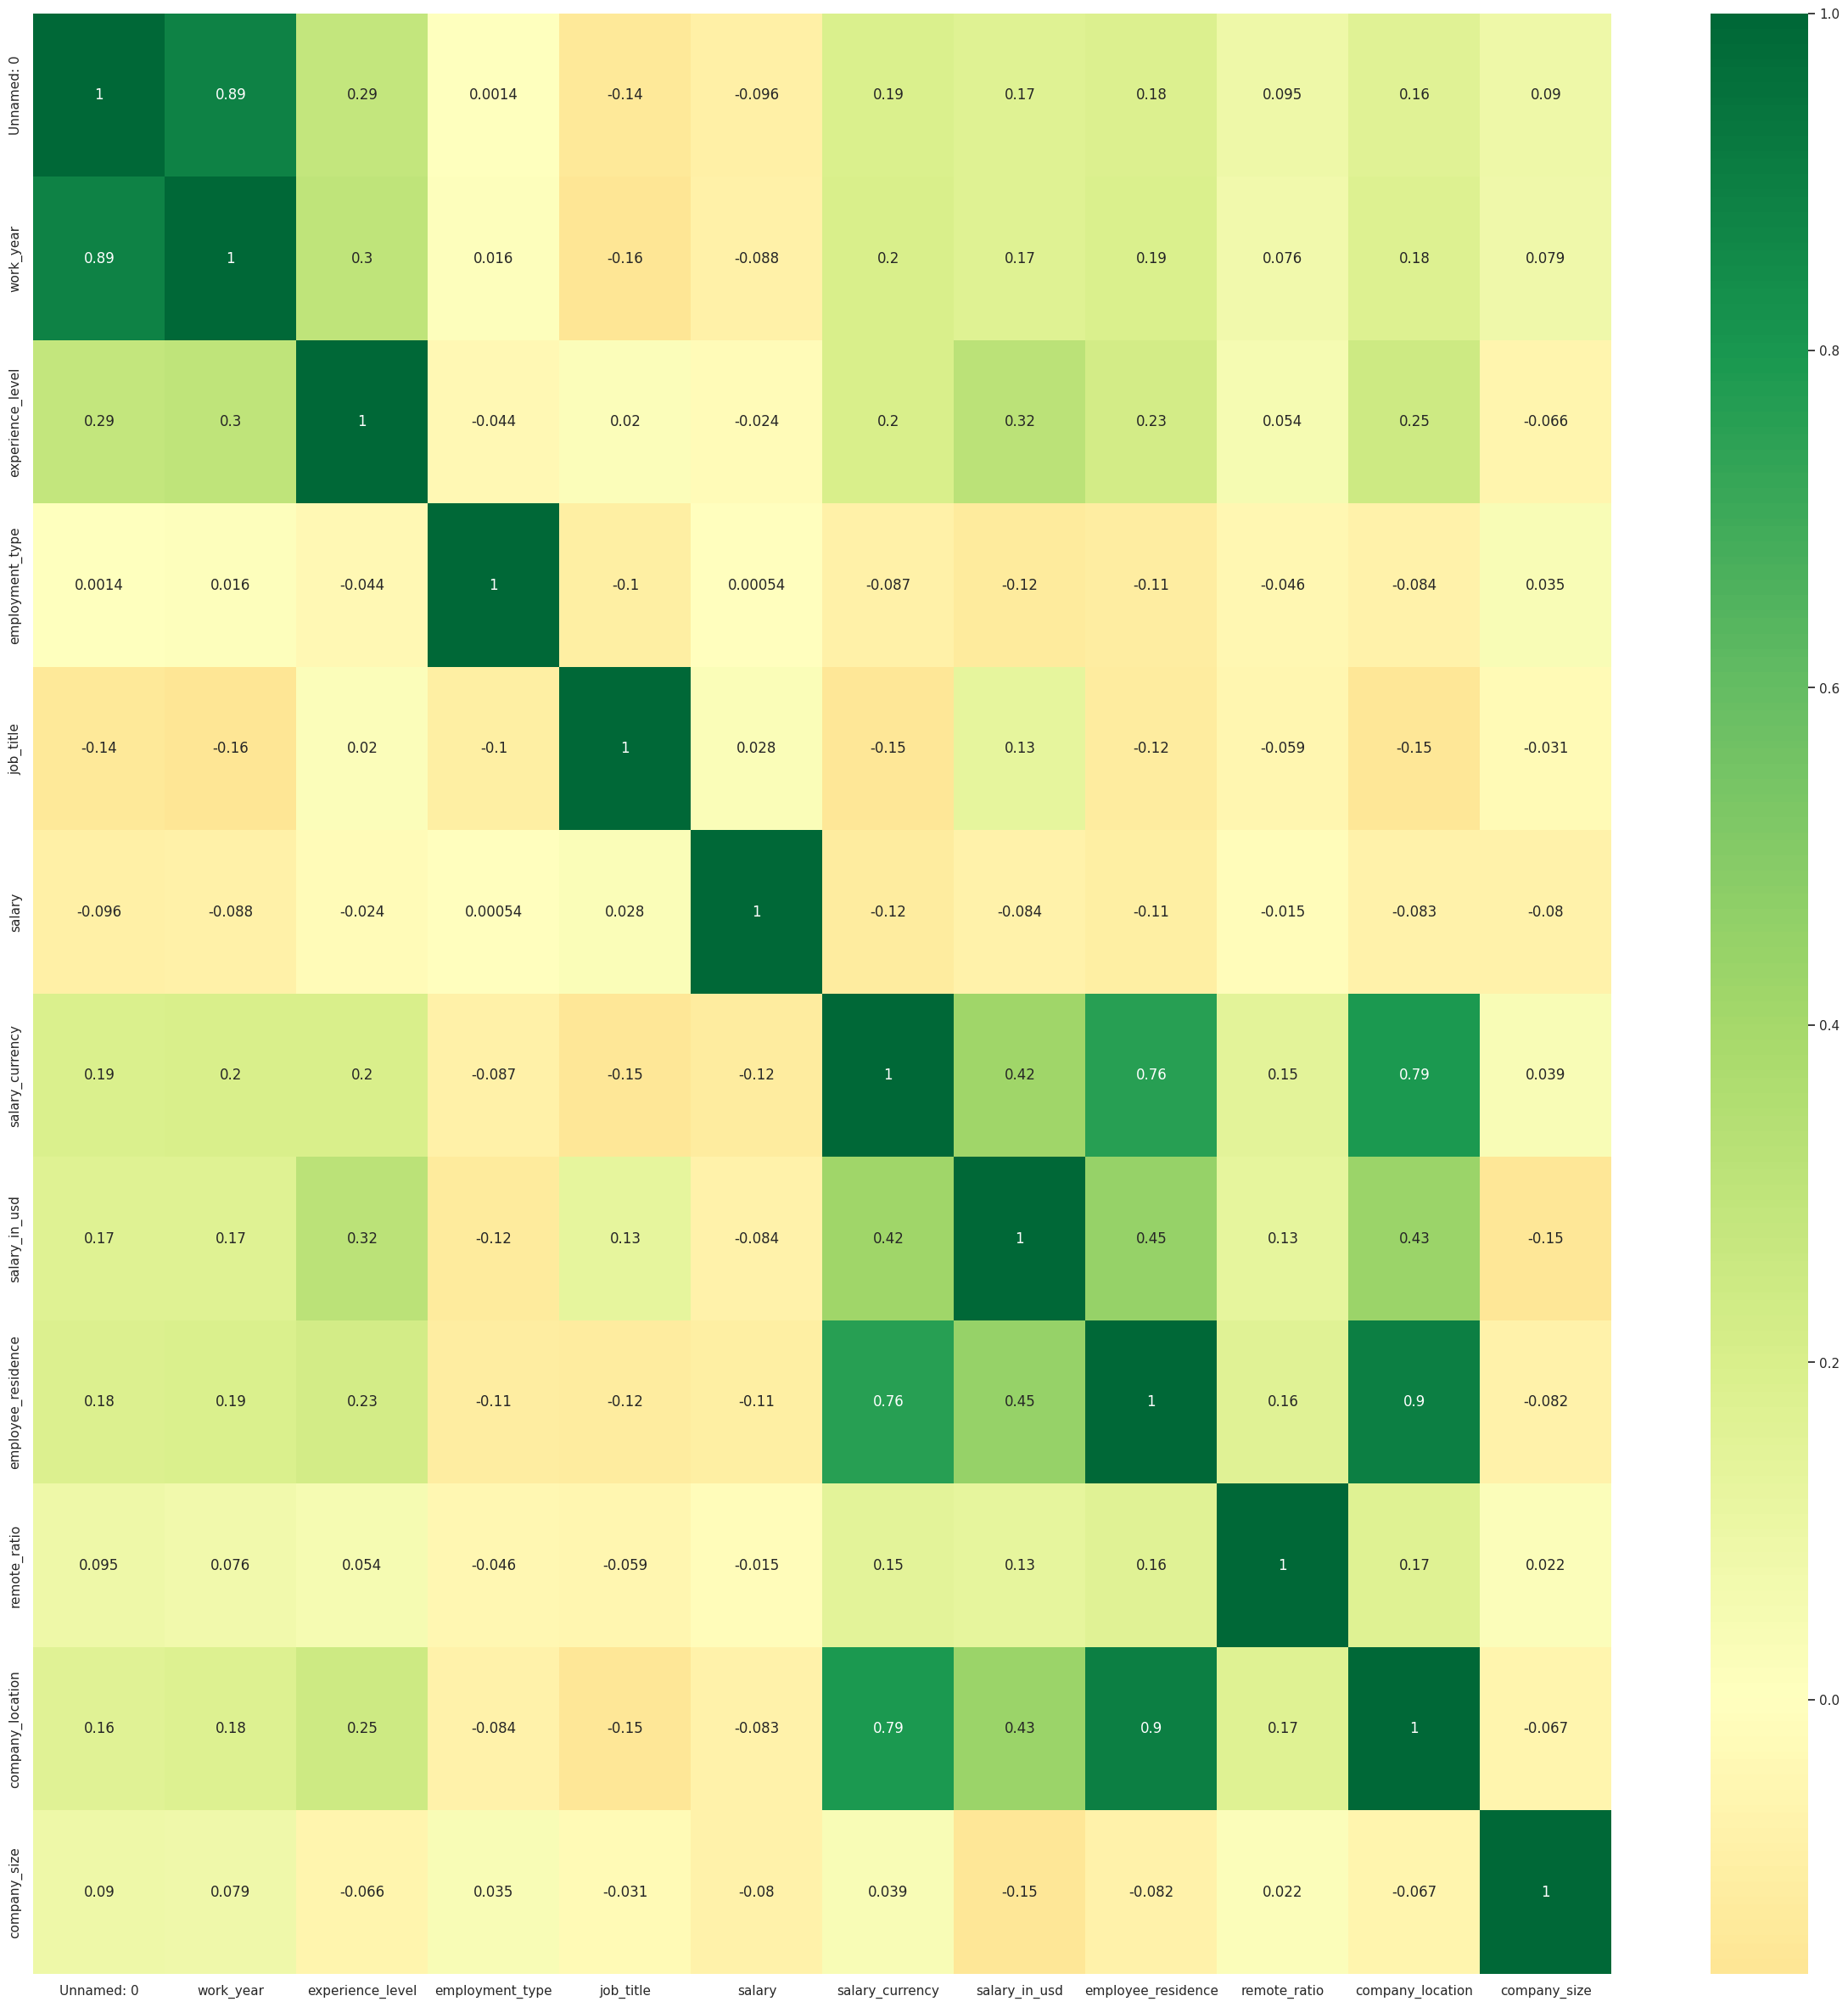

In [42]:
Corr_Matrix = df.corr()

# Set up the figure and plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(Corr_Matrix, annot=True, cmap='RdYlGn', center=0)
plt.show()

In [43]:
print('Top 5 Most Positively Correlated to the To salary_in_usd')
Corr_Matrix['company_location'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the To salary_in_usd


company_location      1.000000
employee_residence    0.897704
salary_currency       0.787084
salary_in_usd         0.428994
experience_level      0.247133
Name: company_location, dtype: float64

In [44]:
print('Top 5 Most Positively Correlated to salary_in_usd ')
Corr_Matrix['salary_in_usd'].sort_values(ascending=True).head(5)

Top 5 Most Positively Correlated to salary_in_usd 


company_size      -0.151205
employment_type   -0.123545
salary            -0.083906
job_title          0.131016
remote_ratio       0.132122
Name: salary_in_usd, dtype: float64

In [45]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,22,70000,7,79833,14,0,12,0
1,1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2,2020,3,2,7,85000,8,109024,20,50,18,1
3,3,2020,2,2,47,20000,16,20000,23,0,20,2
4,4,2020,3,2,38,150000,16,150000,55,50,48,0


In [46]:
X = df.drop(columns=['salary_in_usd','Unnamed: 0'])
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (485, 10)
X_test shape: (122, 10)
y_train shape: (485,)
y_test shape: (122,)


In [47]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual_salary'] = y_test
    submit['Predict_salary'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Random Forest:
R2 Score: 0.95
Mean Absolute Error (MAE): 4867.96
Root Mean Squared Error (RMSE): 13654.23
   index  Actual_salary  Predict_salary
0    563         140250       140228.00
1    289         135000       135013.20
2     76         100000        99309.54
3     78         270000       267949.00
4    182          26005        25270.46
----------------------------------------
Gradient Boosting:
R2 Score: 0.97
Mean Absolute Error (MAE): 5046.24
Root Mean Squared Error (RMSE): 10996.11
   index  Actual_salary  Predict_salary
0    563         140250   147057.724138
1    289         135000   133447.488328
2     76         100000    97711.743315
3     78         270000   275128.083444
4    182          26005    24322.600573
----------------------------------------
The best performing model is: GradientBoostingRegressor with accuracy: 0.97
